In [3]:
import os
import re
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup as BT
import scipy as sci
from sklearn.preprocessing import scale
from PIL import Image
from resizeimage import resizeimage

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [53]:
data = list()

In [54]:
for i in range(1,282):
    try:
        r='C:\\Users\\kikun\\Desktop\\data'+'\manface'+str(i)+'.jpg'
        img=Image.open(r)
        img=img.convert('L')
        img=resizeimage.resize_cover(img, [100, 100])
        arr=np.array(img)
        data.append(arr)
    except:
        pass

In [55]:
for i in range(1,268):
    try:
        r='C:\\Users\\kikun\\Desktop\\woman'+'\manface'+str(i)+'.jpg'
        img=Image.open(r)
        img=img.convert('L')
        img=resizeimage.resize_cover(img, [100, 100])
        arr=np.array(img)
        data.append(arr)
    except:
        pass

In [335]:
def print_faces(lst):
    # 인치로 그림 사이즈를 설정한다
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(len(lst)):
        # 20x20 매트릭스 이미지를 도식한다
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(lst[i], cmap=plt.cm.bone)
        
        p.text(0, 60, str(i))

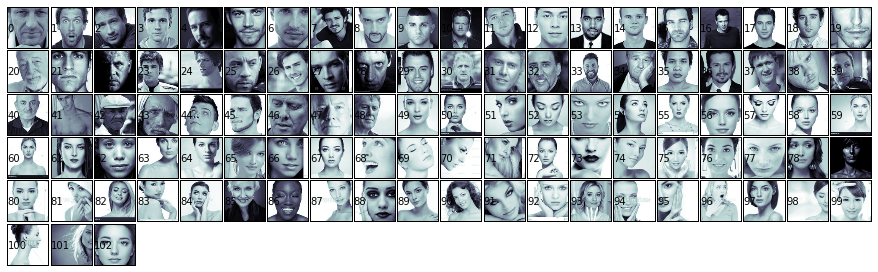

In [315]:
print_faces(data)

In [56]:
y=list()
for i in range(len(data)):
    if i<=48:
        y.append(0)
    else: y.append(1)
len(y) == len(data)

True

In [32]:
##################### optional
for i in range(len(data)):
    data[i]=scale(data[i])

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warning

In [57]:
for i in range(len(data)):
    r,w=data[i].shape
    data[i]=data[i].reshape(r*w)

In [58]:
data2=data[0]
for i in range(1,len(data)):
    data2=np.vstack((data2,data[i]))

In [377]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
svc_1 = SVC(kernel='linear')
print svc_1
logic = LogisticRegression(solver='liblinear')
print logic
svc_2 = SVC(kernel='rbf')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [59]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        data2, y, test_size=0.3, random_state=0)

In [379]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # k-중첩 교차 검증 생성기를 만든다
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # 기본적으로 점수 함수는 에스터메이터의 점수 함수로 반환된 함수를 사용한다(정확도)
    scores = cross_val_score(clf, X, y, cv=cv)
    print scores
    print ("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores))

In [380]:
evaluate_cross_validation(svc_1, X_train, y_train, 5)
evaluate_cross_validation(svc_2, X_train, y_train, 5)
evaluate_cross_validation(logic, X_train, y_train, 5)

[ 0.88235294  0.52941176  0.6875      0.8125      0.625     ]
Mean score: 0.707 (+/-0.063)
[ 0.70588235  0.58823529  0.4375      0.375       0.625     ]
Mean score: 0.546 (+/-0.061)
[ 0.82352941  0.58823529  0.5625      0.625       0.6875    ]
Mean score: 0.657 (+/-0.047)


In [381]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print "Accuracy on training set:"
    print clf.score(X_train, y_train)
    print "Accuracy on testing set:"
    print clf.score(X_test, y_test)
    
    y_pred = clf.predict(X_test)
    
    print "Classification Report:"
    print metrics.classification_report(y_test, y_pred)
    print "Confusion Matrix:"
    print metrics.confusion_matrix(y_test, y_pred)

In [382]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)
print ('\n')
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)
print('\n')
train_and_evaluate(logic, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.714285714286
Classification Report:
             precision    recall  f1-score   support

          0       0.75      0.75      0.75        12
          1       0.67      0.67      0.67         9

avg / total       0.71      0.71      0.71        21

Confusion Matrix:
[[9 3]
 [3 6]]


Accuracy on training set:
1.0
Accuracy on testing set:
0.428571428571
Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        12
          1       0.43      1.00      0.60         9

avg / total       0.18      0.43      0.26        21

Confusion Matrix:
[[ 0 12]
 [ 0  9]]


Accuracy on training set:
1.0
Accuracy on testing set:
0.619047619048
Classification Report:
             precision    recall  f1-score   support

          0       0.67      0.67      0.67        12
          1       0.56      0.56      0.56         9

avg / total       0.62      0.62      0.62        21

Co

In [383]:
n_components = 100
pca = RandomizedPCA(n_components=n_components).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf'), param_grid)
clf = clf.fit(X_train_pca, y_train)

             precision    recall  f1-score   support

          0       0.64      0.60      0.62        15
          1       0.65      0.69      0.67        16

avg / total       0.65      0.65      0.64        31

[[ 9  6]
 [ 5 11]]


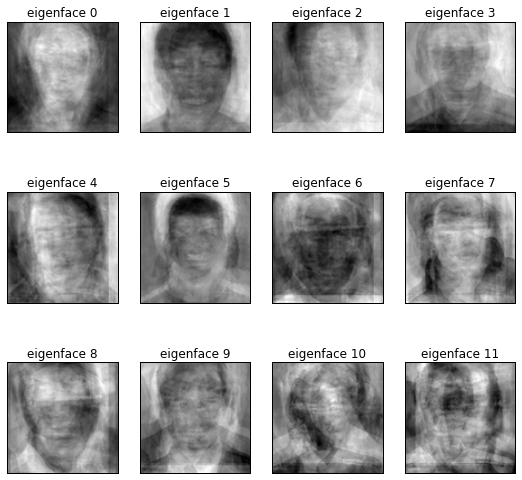

In [106]:
n_samples=103
h, w = (100 , 100)

n_components = len(X_test)

pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
kernel = ['linear','rbf']
param_grid = dict(gamma=gamma_range, C=C_range,kernel=kernel)
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
y_pred = clf.predict(X_test_pca)
print classification_report(y_test, y_pred)
print confusion_matrix(y_test, y_pred, labels=range(2))
# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()


In [13]:
def print_faces3(lst, target):
    # 인치로 그림 사이즈를 설정한다
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(len(lst)):
        # 20x20 매트릭스 이미지를 도식한다
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        img = Image.fromarray(lst[i].reshape(h,w))
        p.imshow(img, cmap=plt.cm.bone)
        
        # 목적값을 이미지에 적는다
        p.text(0, 30, 'boy' if target[i] <1 else 'girl',color='blue')
        p.text(0, 100, str(i),color='red')

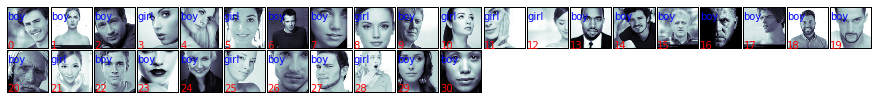

In [100]:
print_faces3(X_test,y_pred)

In [87]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))

In [94]:
xx.ravel().shape

(40000,)